# Tarea Final

## Cargar bibliotecas (dependencias)

In [15]:
!pip3 install -r requirements.txt
!pip3 install imbalanced-learn
!pip3 install wordcloud

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [16]:
import re
import os

from time import time
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import nltk
#from nltk.corpus import stopwords
#nltk.download('stopwords')
#from nltk.corpus import wordnet
#nltk.download('wordnet')
#from nltk.tokenize import word_tokenize
#nltk.download('punkt_tab')  # Necesario para tokenizar
#from nltk.stem import WordNetLemmatizer
#nltk.download('omw-1.4')   # Para sinónimos y definiciones
#nltk.download('averaged_perceptron_tagger_eng')  # Para etiquetas gramaticales

import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

## Lectura de Datos

In [17]:
# DataFrame con todos los discursos:
pd.set_option('display.max_rows', None)
df_wines_white = pd.read_csv('./wine+quality/winequality-white.csv', sep=';')
df_wines_red = pd.read_csv('./wine+quality/winequality-red.csv', sep=';')
df_wines_red #1599 vinos
#df_wines_white #4898 vinos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5


## CALIDAD DE DATOS

In [18]:
#UNIDADES??

#Valores faltantes
df_wines_red.isnull().values.any()
df_wines_white.isnull().values.any
#No hay valores faltantes

#Valores extermos de las caracteristicas de los vinos-outliners
acidity_max=df_wines_red['fixed acidity'].max()   # Valor máximo
acidity_min=df_wines_red['fixed acidity'].min()   # Valor mínimo

acitric_max=df_wines_red['citric acid'].max()   # Valor máximo
acitric_min=df_wines_red['citric acid'].min()   # Valor mínimo

ph_max=df_wines_red['pH'].max()   # Valor máximo
ph_min=df_wines_red['pH'].min()   # Valor mínimo

alcohol_max=df_wines_red['alcohol'].max()   # Valor máximo
alcohol_min=df_wines_red['alcohol'].min()   # Valor mínimo

print("Valor máximo de ácidez:", acidity_max)# Los valores comunes son entre 5,5 y 8,5 g/L 
print("Valor mínimo de ácidez:", acidity_min)

print("Valor máximo de ácido cítrico:", acitric_max)# Los valores comunes son entre 0 y 0,5 g/L 
print("Valor mínimo de ácido cítrico:", acitric_min)

print("Valor máximo de pH:", ph_max)#Los valores comunes son entre 2,8 y 4
print("Valor mínimo de pH:", ph_min)

print("Valor máximo de alcohol:", alcohol_max)#Los valores comunes son entre 12 y 15%
print("Valor mínimo de alcohol:", alcohol_min)

Valor máximo de ácidez: 15.9
Valor mínimo de ácidez: 4.6
Valor máximo de ácido cítrico: 1.0
Valor mínimo de ácido cítrico: 0.0
Valor máximo de pH: 4.01
Valor mínimo de pH: 2.74
Valor máximo de alcohol: 14.9
Valor mínimo de alcohol: 8.4


# Análisis exploratorio

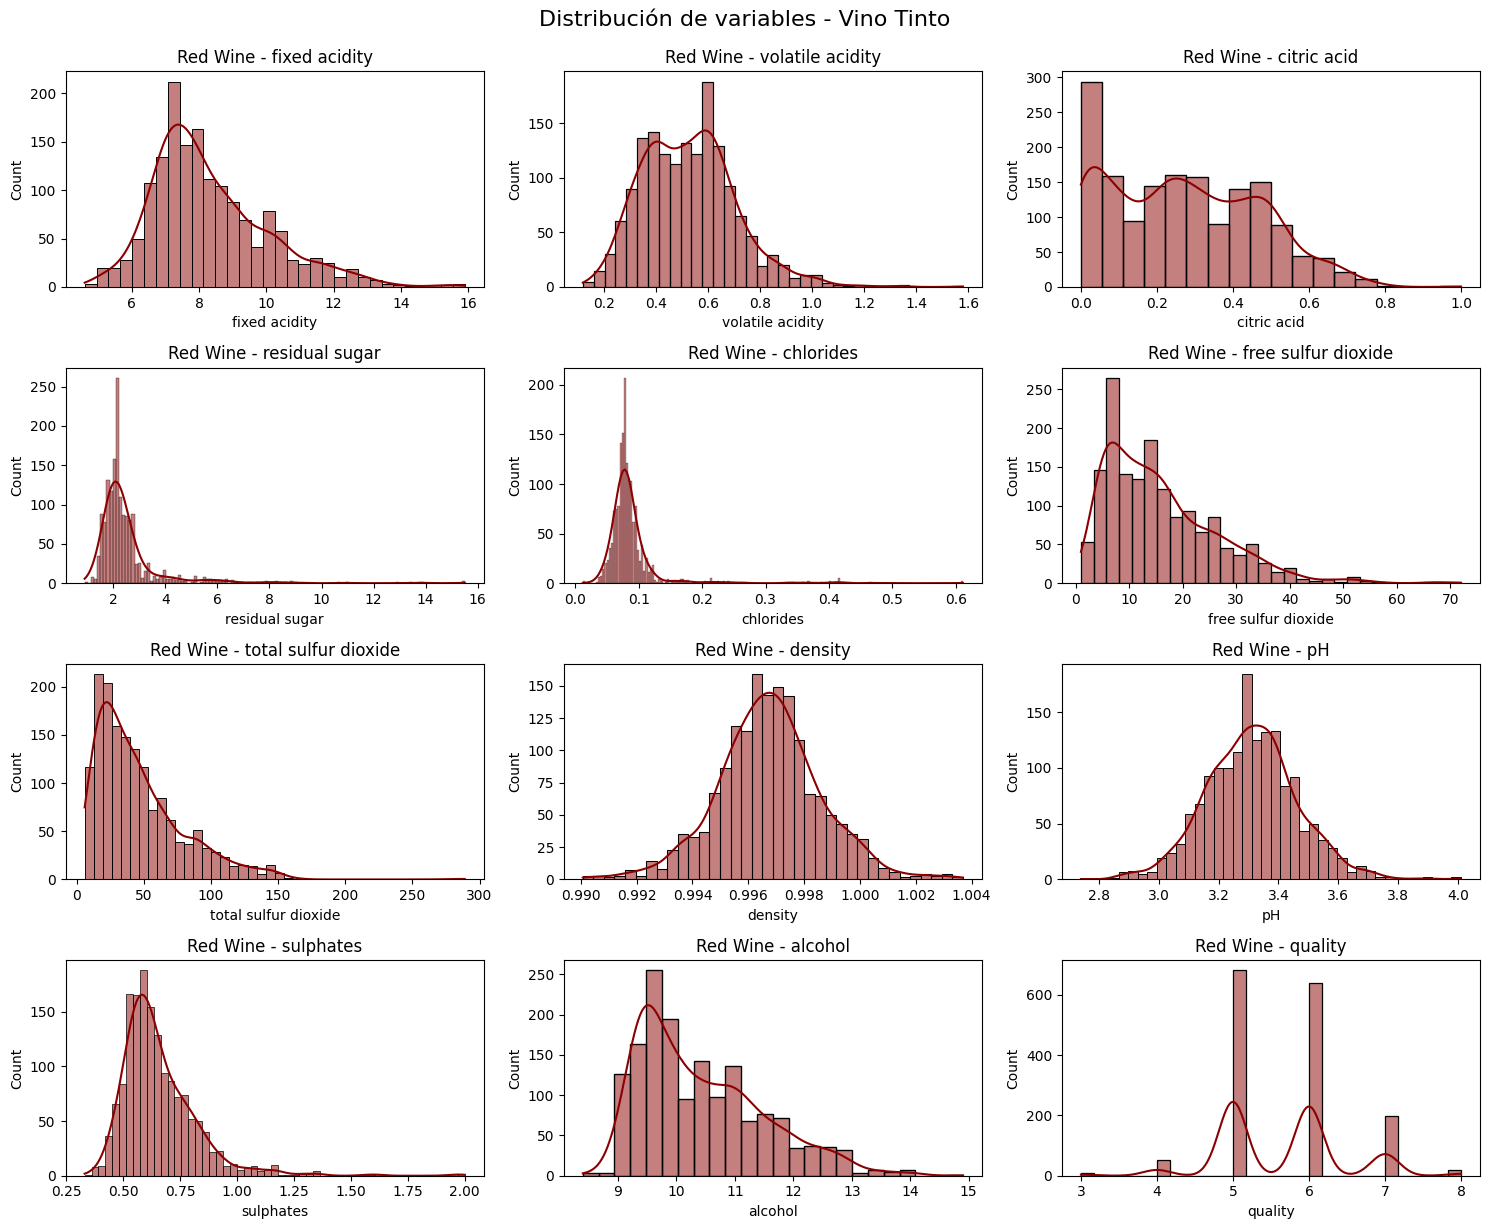

In [19]:
 # Lista de columnas numéricas (todas menos 'quality' si querés separarla)
columnas = df_wines_red.columns.tolist()

# Tamaño del gráfico general
plt.figure(figsize=(15, 12))

# Histogramas para vinos tintos
for i, col in enumerate(columnas):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df_wines_red[col], kde=True, color='darkred')
    plt.title(f'Red Wine - {col}')
    plt.tight_layout()
plt.suptitle('Distribución de variables - Vino Tinto', fontsize=16, y=1.02)
plt.show()

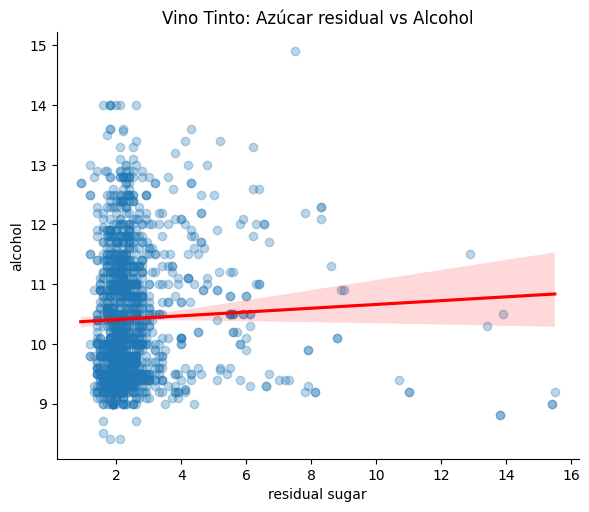

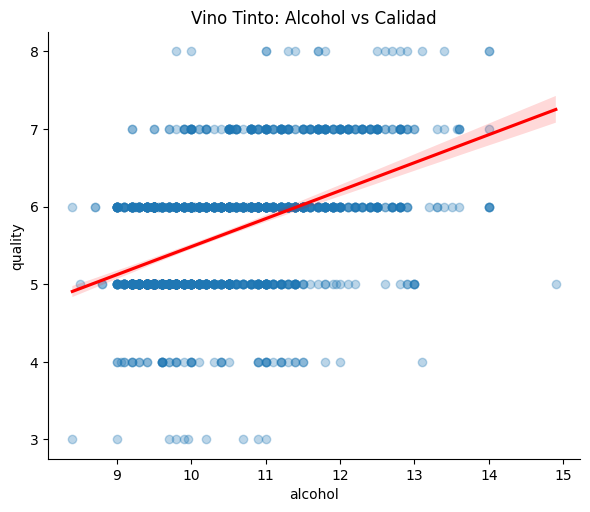

/var/folders/lv/sw4vfvjj3gjbytgrvdlh6c180000gn/T/ipykernel_35506/1886132452.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_wines_red, x='alcohol_bin', y='quality', palette='Reds')


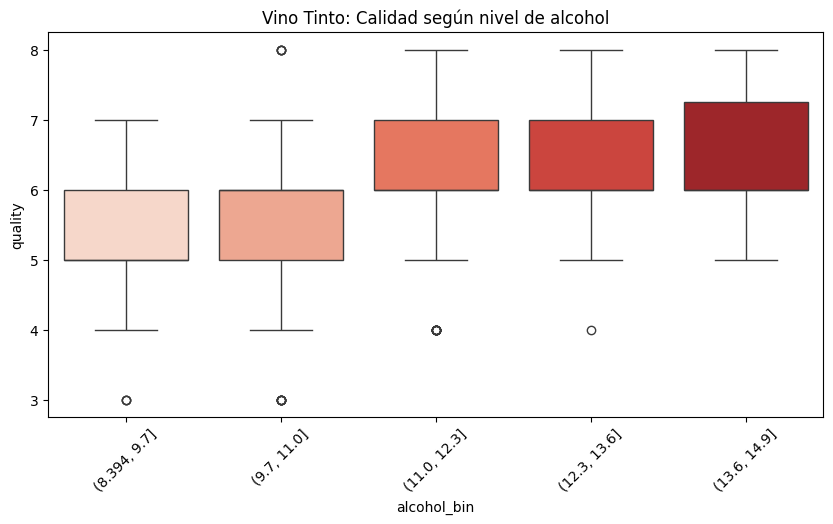

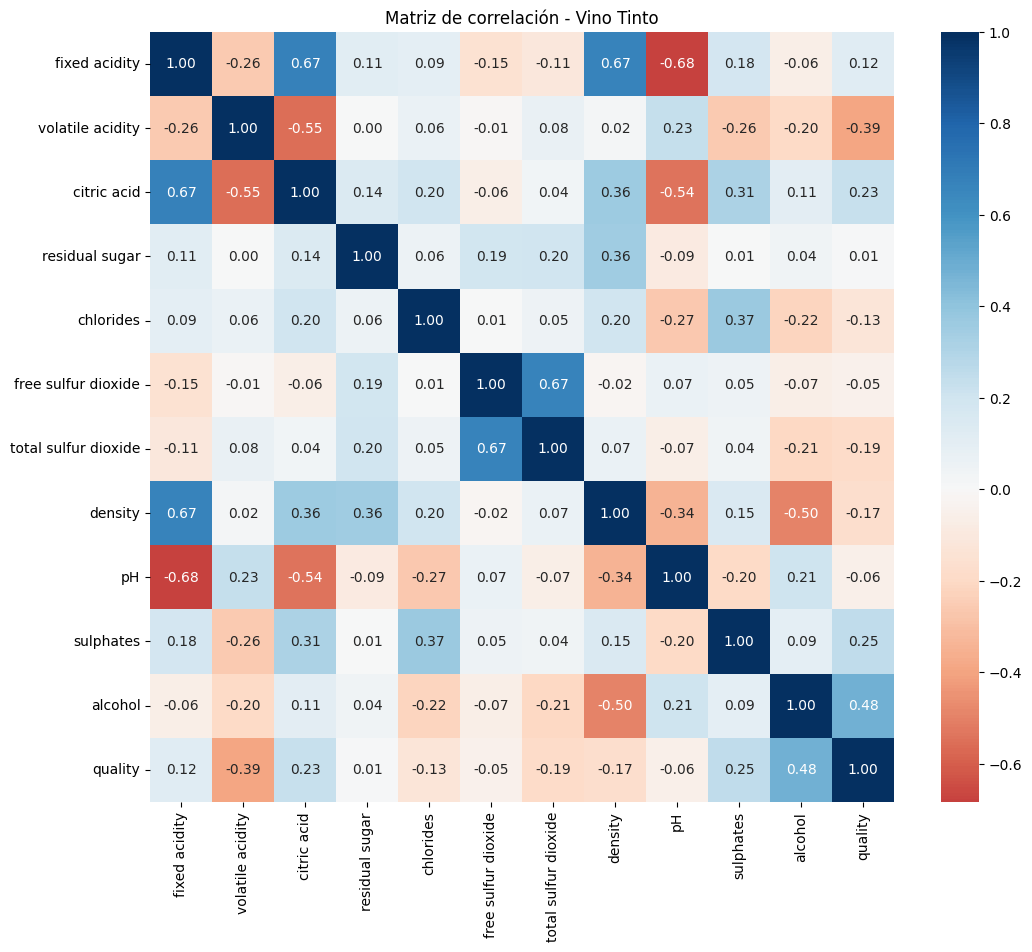

In [20]:
#Correlacion entre las propiedades fisicoquimicas:

# Scatter plot con regresión: vino tinto
sns.lmplot(data=df_wines_red, x="residual sugar", y="alcohol", 
           height=5, aspect=1.2, scatter_kws={"alpha":0.3}, line_kws={"color": "red"})
plt.title("Vino Tinto: Azúcar residual vs Alcohol")
plt.show()

# Vino tinto
sns.lmplot(data=df_wines_red, x="alcohol", y="quality", 
           height=5, aspect=1.2, scatter_kws={"alpha":0.3}, line_kws={"color": "red"})
plt.title("Vino Tinto: Alcohol vs Calidad")
plt.show()

df_wines_red['alcohol_bin'] = pd.cut(df_wines_red['alcohol'], bins=5)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_wines_red, x='alcohol_bin', y='quality', palette='Reds')
plt.title("Vino Tinto: Calidad según nivel de alcohol")
plt.xticks(rotation=45)
plt.show()


# Hacemos una copia sin la columna no numérica
df_corr_red = df_wines_red.drop(columns=['alcohol_bin'], errors='ignore')

# Ahora sí calculamos la correlación
corr_red = df_corr_red.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_red, annot=True, cmap="RdBu", center=0, fmt=".2f")
plt.title("Matriz de correlación - Vino Tinto")
plt.show()

# Limpieza de datos

In [21]:
# Eliminar datos outliers

def eliminar_outliers_iqr_global(df, columnas=None, k=1.5):
    """
    Elimina todas las filas que tengan outliers en al menos una columna numérica, según IQR global.
    """
    if columnas is None:
        columnas = df.select_dtypes(include='number').columns

    # Creamos una máscara de "True" para todas las filas
    mask = pd.Series([True] * df.shape[0], index=df.index)

    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - k * IQR
        lim_sup = Q3 + k * IQR

        # Creamos una máscara booleana para esta columna (True si está dentro de los límites)
        mask_col = df[col].between(lim_inf, lim_sup)
        
        # Combinamos la máscara global (AND lógico)
        mask &= mask_col

    return df[mask]

df_red_sin_outliers = eliminar_outliers_iqr_global(df_wines_red).copy()

#Nueva columna que defina alta y baja calidad
df_red_sin_outliers['alta_calidad'] = (df_red_sin_outliers['quality'] >= 7).astype(int)


In [22]:
#Sin quitar outliers
#Nueva columna que defina alta y baja calidad
#df_wines_red['alta_calidad'] = (df_wines_red['quality'] >= 7).astype(int)

# Muestreo estratificado, escalado y SMOTE

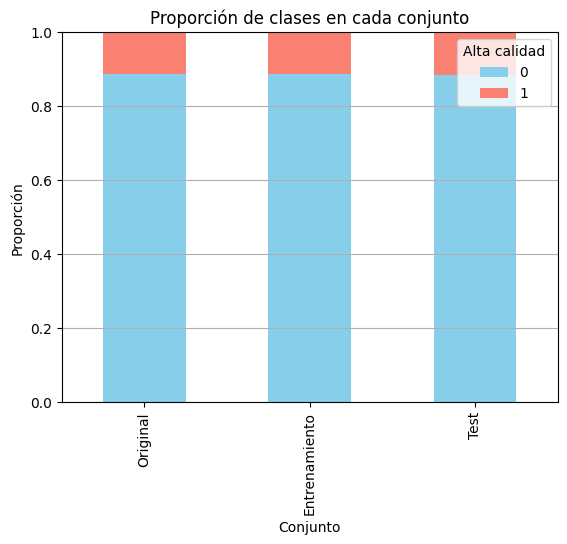


Distribución después de SMOTE:
alta_calidad
0    0.5
1    0.5
Name: proportion, dtype: float64


In [23]:
train, test = train_test_split(
    df_red_sin_outliers,
    test_size=0.3,                # Proporción para el set de test
    stratify=df_red_sin_outliers['alta_calidad'],  # Columna para estratificar
    random_state=17              # Para reproducibilidad
)

# Verificamos la proporción en cada set
#Calcular proporciones de cada clase en cada conjunto
proporciones = {
    'Original': df_red_sin_outliers['alta_calidad'].value_counts(normalize=True),
    'Entrenamiento': train['alta_calidad'].value_counts(normalize=True),
    'Test': test['alta_calidad'].value_counts(normalize=True)
}
proporciones_df = pd.DataFrame(proporciones).T

# Asegura que todas las clases estén presentes en todas las filas
proporciones_df = proporciones_df.fillna(0)

#Graficar
proporciones_df.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Proporción de clases en cada conjunto')
plt.xlabel('Conjunto')
plt.ylabel('Proporción')
plt.legend(title='Alta calidad', loc='upper right')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

#Escalado del conjunto train
# Selección correcta de columnas numéricas
X = train.select_dtypes(include='number').drop(columns=['alcohol bin','quality', 'alta_calidad'], errors='ignore')

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar features y target en el set de entrenamiento 
X_train= pd.DataFrame(X_scaled, index=X.index)
y_train = train['alta_calidad']

# Aplicar SMOTE en el conjunto train
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar el nuevo balance
print("\nDistribución después de SMOTE:")
print(y_train_res.value_counts(normalize=True))


# PCA

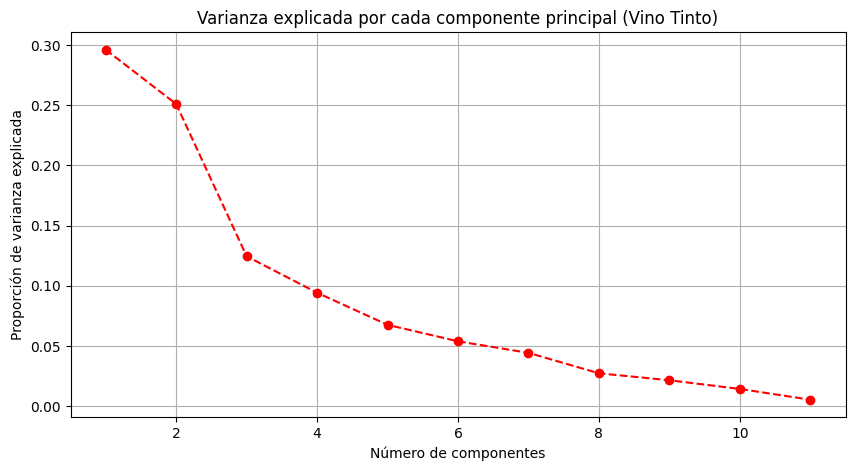

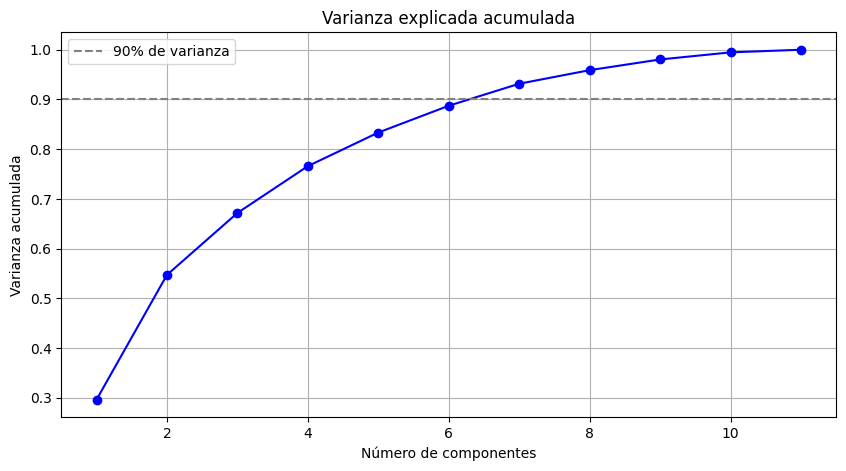

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


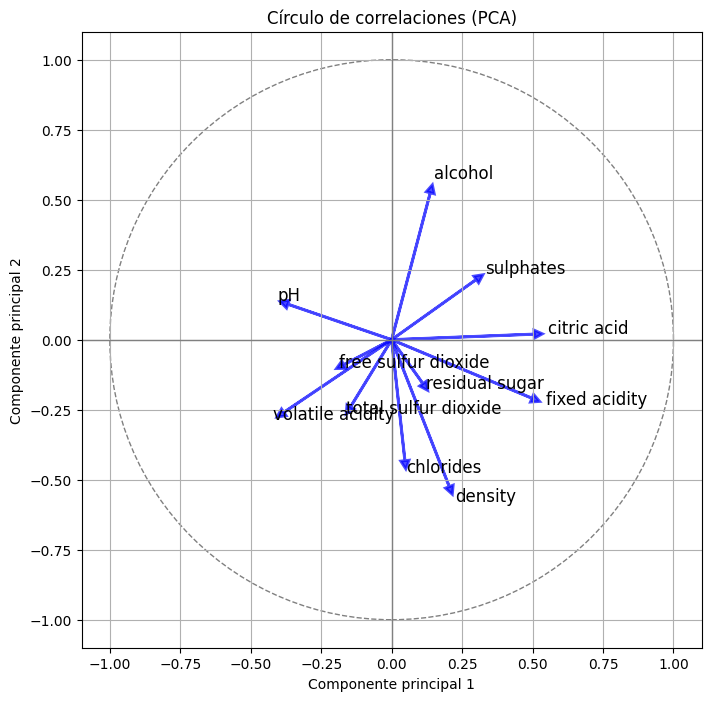

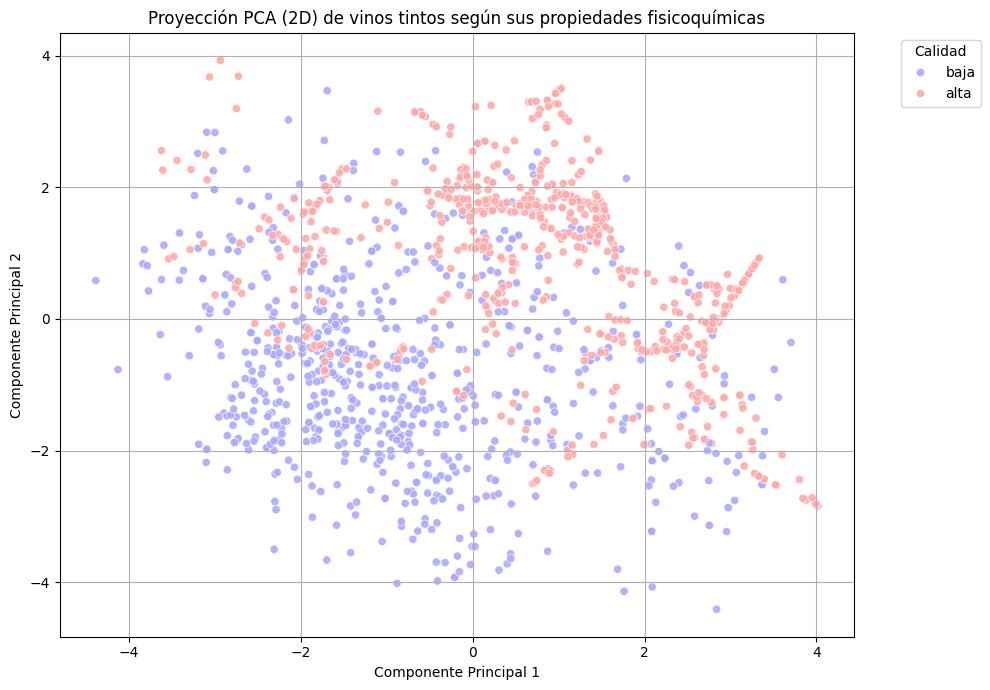

In [30]:
# Ajustar PCA con todos los componentes posibles
pca_full = PCA()
pca_full.fit(X_train_res)

#Graficar varianza explicada por cada componente
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1), 
         pca_full.explained_variance_ratio_, marker='o', linestyle='--', color='red')
plt.title("Varianza explicada por cada componente principal (Vino Tinto)")
plt.xlabel("Número de componentes")
plt.ylabel("Proporción de varianza explicada")
plt.grid(True)
plt.show()

#Graficar la varianza acumulada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1), 
         pca_full.explained_variance_ratio_.cumsum(), marker='o', linestyle='-', color='blue')
plt.title("Varianza explicada acumulada")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.grid(True)
plt.axhline(0.90, color='gray', linestyle='--', label='90% de varianza')
plt.legend()
plt.show()

# Seleccionamos las dos primeras componentes principales
#X_pca = pca.fit_transform(X_scaled) #sin SMOTE
X_pca = pca.fit_transform(X_train_res) #con SMOTE

componentes = pca.components_
pc1 = componentes[0]
pc2 = componentes[1]

# Nombres de las variables originales
features = X.columns

plt.figure(figsize=(8,8))
circle = plt.Circle((0,0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Dibujar flechas para cada variable
for i in range(len(features)):
    plt.arrow(0, 0, pc1[i], pc2[i], 
              head_width=0.03, head_length=0.03, 
              linewidth=2, color='b', alpha=0.7)
    plt.text(pc1[i]*1.1, pc2[i]*1.1, features[i], fontsize=12)

plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Círculo de correlaciones (PCA)')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()

# Crear un DataFrame con las dos primeras componentes y la calidad
df_pca_plot = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
#df_pca_plot['alta_calidad'] = y_train_res.values     # con SMOTE
df_pca_plot['alta_calidad'] = y_train_res.map({1: 'alta', 0: 'baja'})

# Gráfico de dispersión coloreado por calidad
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca_plot, x='PC1', y='PC2', hue='alta_calidad', palette='bwr', alpha=0.9)
plt.title("Proyección PCA (2D) de vinos tintos según sus propiedades fisicoquímicas")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Calidad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [177]:
#PCA a aplicar
umbral = 0.90  
varianza_acumulada = pca_full.explained_variance_ratio_.cumsum()
n_componentes_optimo = np.argmax(varianza_acumulada >= umbral) + 1
print(f"Número óptimo de componentes para explicar al menos el {umbral*100}% de la varianza: {n_componentes_optimo}")

pca = PCA(n_components=n_componentes_optimo)
X_pca = pca.fit_transform(X_scaled) #sin SMOTE
X_pca_smote = pca.fit_transform(X_train_res) #con SMOTE

Número óptimo de componentes para explicar al menos el 90.0% de la varianza: 7


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_

# Modelo

Accuracy: 0.903954802259887
              precision    recall  f1-score   support

        Baja       0.93      0.97      0.95       313
        Alta       0.63      0.41      0.50        41

    accuracy                           0.90       354
   macro avg       0.78      0.69      0.72       354
weighted avg       0.89      0.90      0.90       354

Matriz de confusión:
 [[303  10]
 [ 24  17]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


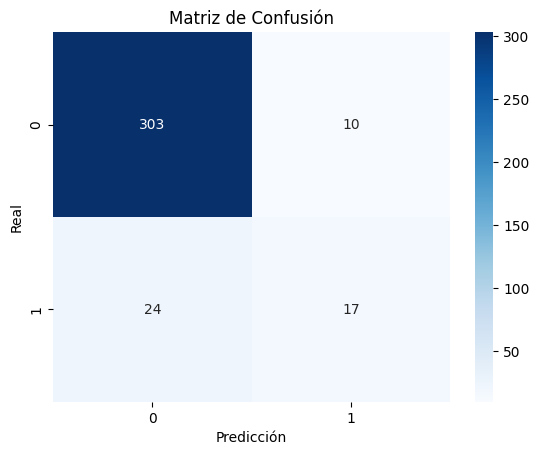

In [185]:
# Transformar los datos de test 
X_test = test.drop(columns=['alta_calidad', 'quality'])
y_test =test['alta_calidad']
X_test = scaler.transform(X_test)      
X_test_pca = pca.transform(X_test)     #Con PCA

# MODELO: RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
#clf.fit(X_pca, y_train_res)                  #Con PCA
#clf.fit(X_train_res, y_train_res)             #Con SMOTE
clf.fit(X_train, y_train)                     #Sin nada
#Predecir sobre el set de test
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Baja', 'Alta']))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # annot=True muestra los números
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.79      0.86       313
           1       0.31      0.73      0.43        41

    accuracy                           0.78       354
   macro avg       0.63      0.76      0.65       354
weighted avg       0.88      0.78      0.81       354



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_linea

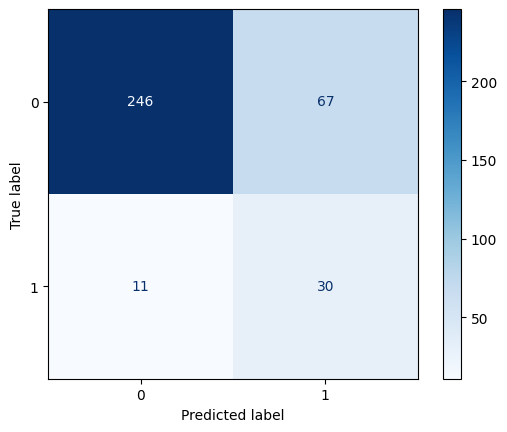

In [179]:
# MODELO LINEAL: Logistic Regression

# Entrenar modelo de Regresión logística 
modelo_lr = LogisticRegression(class_weight='balanced', max_iter=1000)
modelo_lr.fit(X_train, y_train)                     #Sin nada
#modelo_lr.fit(X_pca, y_train)                  #Con PCA y sin SMOTE
#modelo_lr.fit(X_train_res, y_train_res)             #Sin PCA y con SMOTE
#modelo_lr.fit(X_pca_smote, y_train_res)                  #Con PCA y con SMOTE 

# Evaluación del modelo
y_pred = modelo_lr.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros encontrados:
  - C: 10
  - penalty: l1
  - solver: liblinear
Métricas sobre el conjunto de test:
              precision    recall  f1-score   support

           0       0.96      0.79      0.86       313
           1       0.31      0.73      0.43        41

    accuracy                           0.78       354
   macro avg       0.63      0.76      0.65       354
weighted avg       0.88      0.78      0.81       354



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

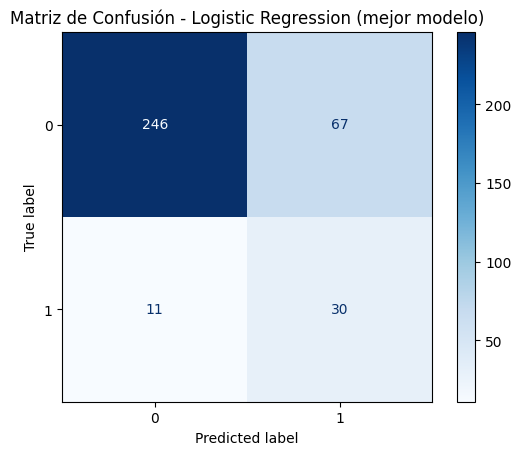

In [183]:
# Definir el modelo base
lr = LogisticRegression(class_weight='balanced', max_iter=1000)

# Definir el espacio de búsqueda
param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],  # Soporta l1 y l2 pero no elasticnet
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],      # Saga soporta elasticnet
        'l1_ratio': [0.1, 0.5, 0.7, 0.9]  # Mezcla L1 y L2
    }
]

# Configurar búsqueda con validación cruzada
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Entrenamiento con búsqueda
grid_search.fit(X_train, y_train)                     #Sin nada
#grid_search.fit(X_pca, y_train)                  #Con PCA y sin SMOTE                    

# Obtener mejor modelo y mejores hiperparámetros
mejor_modelo = grid_search.best_estimator_
mejores_params = grid_search.best_params_

# Mostrarlos explícitamente
print("Mejores hiperparámetros encontrados:")
for param, val in mejores_params.items():
    print(f"  - {param}: {val}")

# Evaluar en conjunto de test
y_pred = mejor_modelo.predict(X_test)

print("Métricas sobre el conjunto de test:")
print(classification_report(y_test, y_pred))

# Matriz de confusión con color azul
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Matriz de Confusión - Logistic Regression (mejor modelo)")
plt.show()


Métricas LinearSVC:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       313
           1       0.30      0.68      0.42        41

    accuracy                           0.78       354
   macro avg       0.63      0.74      0.64       354
weighted avg       0.88      0.78      0.81       354



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


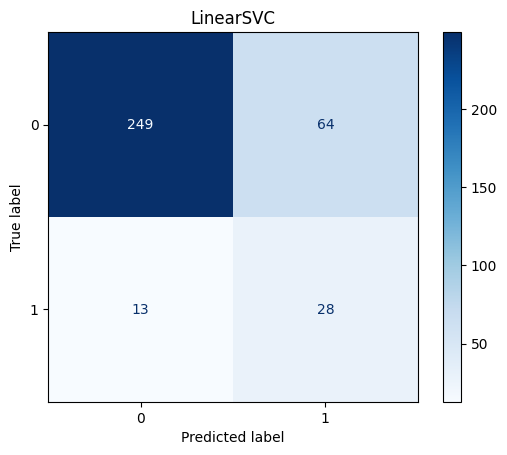

In [181]:
# MODELO LINEAL: Linear SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

# LinearSVC necesita escalar los datos
svc_pipeline = make_pipeline(
    StandardScaler(),
    LinearSVC(class_weight='balanced', max_iter=5000)
)

# Entrenar el modelo
svc_pipeline.fit(X_pca_smote, y_train_res)            #Con PCA y con SMOTE 


# Predecir sobre el conjunto de test
y_pred_svc = svc_pipeline.predict(X_test_pca)

# Evaluar el modelo
print("Métricas LinearSVC:")
print(classification_report(y_test, y_pred_svc))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc, cmap="Blues")
plt.title("LinearSVC")
plt.show()